In [1]:
# libraries
from astropy import coordinates, units
from astropy import units as u # shortcut

from astroquery.simbad import Simbad

from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_airmass 
from astroplan.plots import plot_finder_image
from astroplan.plots import plot_sky

import matplotlib.pyplot as plt 

In [2]:
# sometimes we have to update the database; if that's necessary, a message will pop up telling us
from astropy.utils import iers
iers.conf.IERS_A_URL = 'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
iers.conf.IERS_A_URL_MIRROR = 'https://datacenter.iers.org/data/9/finals2000A.all'
from astroplan import download_IERS_A
download_IERS_A()


In [3]:
#Campus teaching observatory
CTO = Observer(location=coordinates.EarthLocation(lat=29.643018, lon=-82.349004*u.deg, height=31*u.m),
               timezone='US/Eastern',
               name='University of Florida Campus Teaching Observatory',
              )
CTO

<Observer: name='University of Florida Campus Teaching Observatory',
    location (lon, lat, el)=(-82.34900399999998 deg, 29.643018 deg, 30.99999999950558 m),
    timezone=<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>>

In [4]:
# Time set
from astropy.time import Time

date = Time({'year': 2021, 'month': 10, 'day': 1})
date



# to eastern time
def eastern(time):
    est = time.to_datetime(timezone=CTO.timezone)
    
    return est.strftime('%H:%M:%S')


In [5]:
## Sun set and sun rise times from CTO
# CTO.sun_set_time(now), CTO.sun_rise_time(now) 
# CTO.sun_set_time(now).iso, CTO.sun_rise_time(now).iso # in a more readable format
(eastern(CTO.sun_set_time(date)), eastern(CTO.sun_rise_time(date))) # in eastern

('19:11:53', '07:26:40')

In [6]:
## create coordinates for targets
deneb_coord = coordinates.SkyCoord.from_name('Deneb') # A planetary nebula:
ngc6543_coord = coordinates.SkyCoord.from_name('NGC 6543') # a star cluster in Casseiopeia 
hPersei_coord = coordinates.SkyCoord.from_name('H Persei Cluster') # a faint star near M31
hd3914_coord = coordinates.SkyCoord.from_name('HD 3914') # a dwarf galaxy near the Andromeda galaxy
m32_coord = coordinates.SkyCoord.from_name('M32') # a dwarf galaxy near the Andromeda galaxy
hd85161_coord = coordinates.SkyCoord.from_name('HD 85161') #  a faint star near M82
m82_coord = coordinates.SkyCoord.from_name('M82') #  a galaxy driving an outflow

In [7]:
## turning the objects into targets, printing rising acension
## printing ra and dec for each star

deneb_target = FixedTarget(deneb_coord, name="Deneb")
ngc6543_target = FixedTarget(ngc6543_coord, name="NGC 6543")
hPersei_target = FixedTarget(hPersei_coord, name="H Persei Cluster")
hd3914_target = FixedTarget(hd3914_coord, name="HD 3914")
m32_target = FixedTarget(m32_coord, name="M32")
hd85161_target = FixedTarget(hd85161_coord, name="HD 85161")
m82_target = FixedTarget(m82_coord, name="M82")

deneb_target, ngc6543_target, hPersei_target, hd3914_target, m32_target, hd85161_target, m82_target

(<FixedTarget "Deneb" at SkyCoord (ICRS): (ra, dec) in deg (310.35797975, 45.28033881)>,
 <FixedTarget "NGC 6543" at SkyCoord (ICRS): (ra, dec) in deg (269.63918438, 66.63298582)>,
 <FixedTarget "H Persei Cluster" at SkyCoord (ICRS): (ra, dec) in deg (34.75, 57.12833333)>,
 <FixedTarget "HD 3914" at SkyCoord (ICRS): (ra, dec) in deg (10.50594554, 40.68825447)>,
 <FixedTarget "M32" at SkyCoord (ICRS): (ra, dec) in deg (10.67427083, 40.86516944)>,
 <FixedTarget "HD 85161" at SkyCoord (ICRS): (ra, dec) in deg (148.32181565, 69.85875942)>,
 <FixedTarget "M82" at SkyCoord (ICRS): (ra, dec) in deg (148.96845833, 69.67970278)>)

In [8]:
# are targets up?
CTO.target_is_up(date, [deneb_target, ngc6543_target, hPersei_target, hd3914_target, m32_target, hd85161_target, m82_target])

array([ True,  True,  True,  True,  True,  True,  True])

In [9]:
# Deneb rise and set time
(eastern(CTO.target_rise_time(time=date, target=deneb_target)),
 eastern(CTO.target_set_time(time=date, target=deneb_target)))

('13:12:07', '05:50:57')

In [10]:
# ngc6543_target rise and set time
# errors because target is always up
(eastern(CTO.target_rise_time(time=date, target=ngc6543_target)),
 eastern(CTO.target_set_time(time=date, target=ngc6543_target)))

C:\ProgramData\Anaconda3\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\ProgramData\Anaconda3\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


ValueError: year -4713 is out of range

In [11]:
# hPersei_target rise and set time
(eastern(CTO.target_rise_time(time=date, target=hPersei_target)),
 eastern(CTO.target_set_time(time=date, target=hPersei_target)))

('17:02:04', '13:19:49')

In [12]:
# hd3914_target rise and set time
(eastern(CTO.target_rise_time(time=date, target=hd3914_target)),
 eastern(CTO.target_set_time(time=date, target=hd3914_target)))

('17:35:30', '09:32:16')

In [13]:
# m32_target rise and set time
(eastern(CTO.target_rise_time(time=date, target=m32_target)),
 eastern(CTO.target_set_time(time=date, target=m32_target)))

('17:35:22', '09:33:45')

In [14]:
# hd85161_target rise and set time
# error because target is always up
(eastern(CTO.target_rise_time(time=date, target=hd85161_target)),
 eastern(CTO.target_set_time(time=date, target=hd85161_target)))

ValueError: year -4713 is out of range

In [15]:
# m82_target rise and set time
# error because target is always up
(eastern(CTO.target_rise_time(time=date, target=m82_target)),
 eastern(CTO.target_set_time(time=date, target=m82_target)))

ValueError: year -4713 is out of range

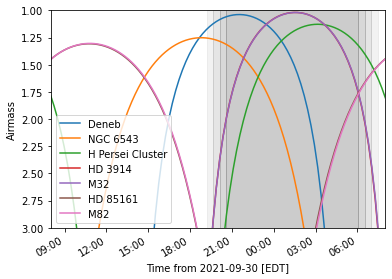

In [45]:
from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt 

plot_airmass([deneb_target, ngc6543_target, hPersei_target, hd3914_target, m32_target, hd85161_target,m82_target],
             observer=CTO,
             time=date.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show() 

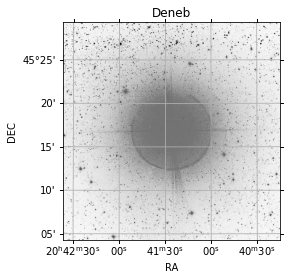

In [46]:
ax, hdu = plot_finder_image(deneb_target, survey='DSS', fov_radius=25*u.arcmin)

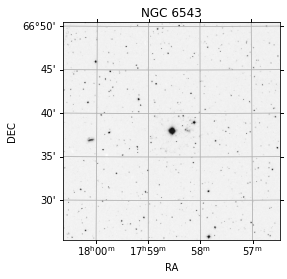

In [47]:
ax, hdu = plot_finder_image(ngc6543_target, survey='DSS', fov_radius=25*u.arcmin)

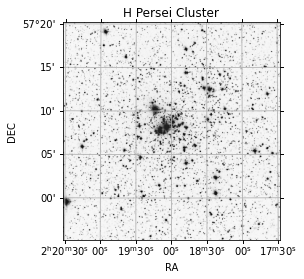

In [48]:
ax, hdu = plot_finder_image(hPersei_target, survey='DSS', fov_radius=25*u.arcmin)

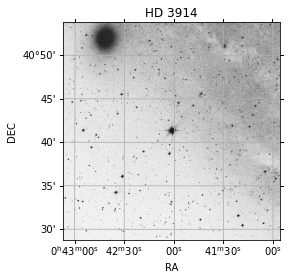

In [49]:
ax, hdu = plot_finder_image(hd3914_target, survey='DSS', fov_radius=25*u.arcmin)

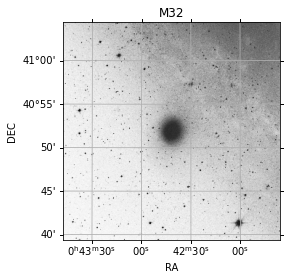

In [50]:
ax, hdu = plot_finder_image(m32_target, survey='DSS', fov_radius=25*u.arcmin)

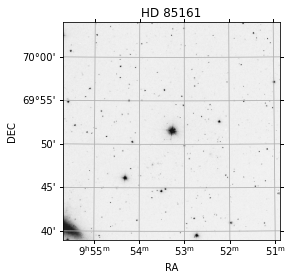

In [51]:
ax, hdu = plot_finder_image(hd85161_target, survey='DSS', fov_radius=25*u.arcmin)

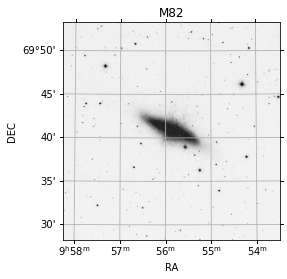

In [52]:
ax, hdu = plot_finder_image(m82_target, survey='DSS', fov_radius=25*u.arcmin)

In [1]:
## Finder chart ##

# where the objects are at sunset
sunset = CTO.sun_set_time(date)

# hour after sunset
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

targets = [deneb_target, ngc6543_target, hPersei_target, hd3914_target, m32_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

NameError: name 'CTO' is not defined